## Unsupervised Learning

by Atmam Al Faruq

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [9]:
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

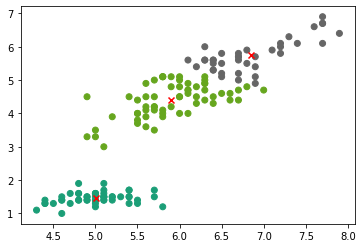

In [40]:
import matplotlib.pyplot as plt

centroid = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,2],c=kmeans.labels_,cmap='Dark2')
plt.scatter(centroid[:,0],centroid[:,2],marker='x',color='r')

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(Y,kmeans.labels_))
print(classification_report(Y,kmeans.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Hierarchical

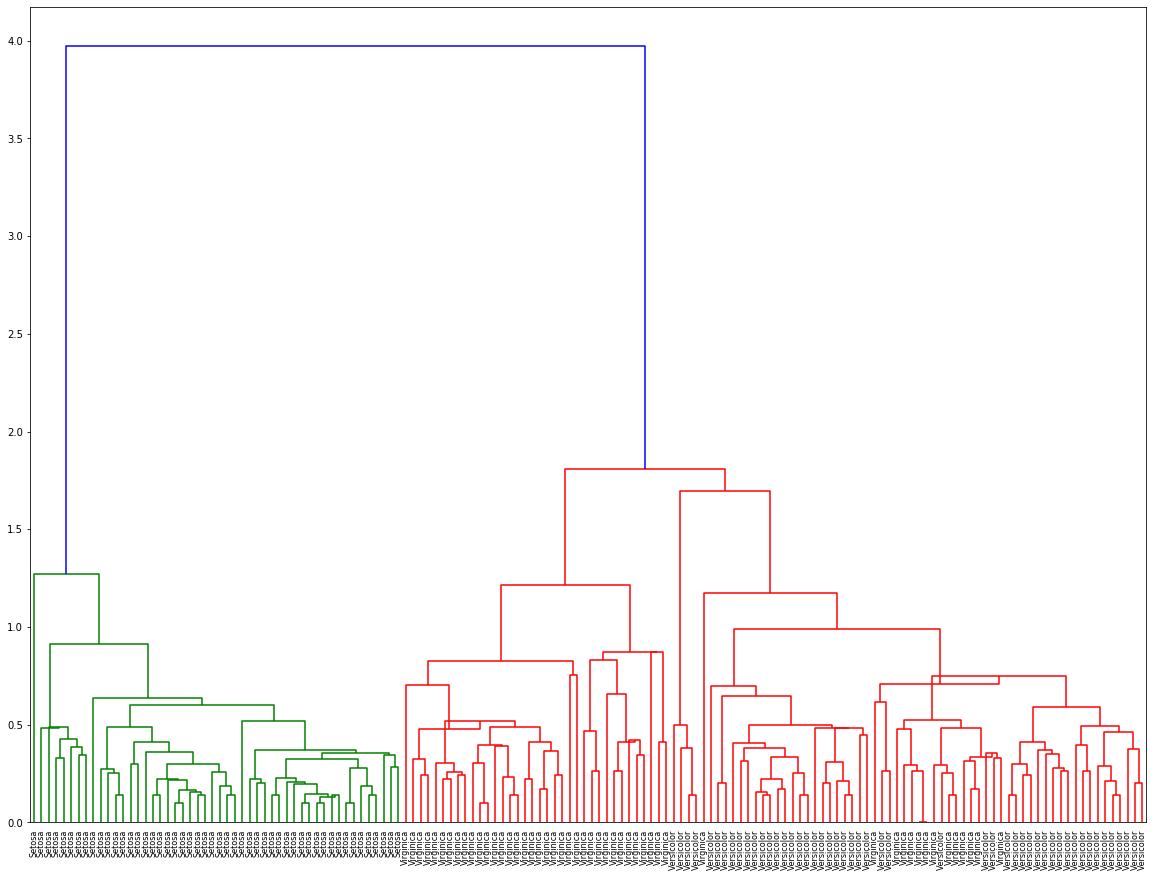

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram

species = []

for i in iris.target:
    if i == 0:
        species.append('Setosa')
    elif i == 1:
        species.append('Versicolor')
    elif i == 2:
        species.append('Virginica')

merge = linkage(X, method='centroid')

plt.subplots(figsize=(20,15))
dendrogram(merge,labels=species,leaf_rotation=90,leaf_font_size=8,)
plt.show()

## TSne

In [61]:
from sklearn.manifold import TSNE

model_tsne = TSNE(learning_rate=100)

fit_model = model_tsne.fit_transform(iris.data)

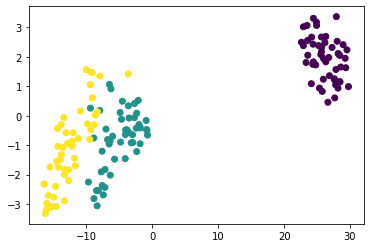

In [64]:
x_axis = fit_model[:,0]
y_axis = fit_model[:,1]

plt.scatter(x_axis, y_axis, c=iris.target)